In [2]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualizing Spider activity experiment

Download data from the file **Practice 4_data1.csv** into dataframe called **df**. Print first six line of the dataframe. It should look like this

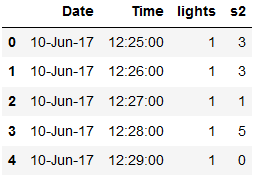

In [3]:
df=pd.read_csv('Practice 4_data1.csv')
display(df.head())

,Date,Time,lights,s2
0,10-Jun-17,12:25:00,1,3
1,10-Jun-17,12:26:00,1,3
2,10-Jun-17,12:27:00,1,1
3,10-Jun-17,12:28:00,1,5
4,10-Jun-17,12:29:00,1,0


## Experiment 1: Extracting experimental information

Make a list of dates of the experiments and provide informative printout

In [4]:
unique=df.Date.unique()
print('The days that this experiment ran were: ',str(unique))

The days that this experiment ran were:  ['10-Jun-17' '11-Jun-17' '12-Jun-17' '13-Jun-17' '14-Jun-17' '15-Jun-17'
 '16-Jun-17' '17-Jun-17' '18-Jun-17' '19-Jun-17' '20-Jun-17' '21-Jun-17'
 '22-Jun-17' '23-Jun-17' '24-Jun-17' '25-Jun-17' '26-Jun-17' '27-Jun-17'
 '28-Jun-17']


Wriate a code which calculates total duration of the experiment(in days) and provides informative printout

In [5]:
leng=len(unique)
print(' The experiment ran for',str(leng),'days.')

 The experiment ran for 19 days.


if day starts at noon(12:00), how many full days of the recordings included in the experiment? Write a code which calculates answer to this question and provide the informative printout

In [6]:
tot=len(df.Time)/(24*60)
print('The experiment ran for',str(int(tot)), 'total days')

The experiment ran for 18 total days


For the rest of this tutorial, we will be working only with full days of recordings Delete incomplete days from the dataframe. Print the head of the datframe, it should look like this:

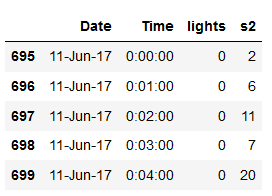

In [45]:
df = df[df.Date != '10-Jun-17']
df = df[df.Date != '28-Jun-17']
display(df.head())

,Date,Time,lights,s1,s2,s3,s4,s5,s6,s7,...,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32
Date_Time,,,,,,,,,,,,,,,,,,,,,
11-Jun-17 0:00:00,11-Jun-17,0:00:00,0,6,2,0,0,0,0,7,...,5,1,0,0,0,0,0,7,6,0
11-Jun-17 0:01:00,11-Jun-17,0:01:00,0,0,6,0,0,0,0,8,...,0,7,0,4,0,0,0,0,0,0
11-Jun-17 0:02:00,11-Jun-17,0:02:00,0,0,11,0,0,0,0,0,...,0,0,0,17,0,0,0,0,1,0
11-Jun-17 0:03:00,11-Jun-17,0:03:00,0,0,7,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
11-Jun-17 0:04:00,11-Jun-17,0:04:00,0,0,20,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0


Add another column which combines date and time (Date_Time) and make it a new index for your dataframe. It should look like this:

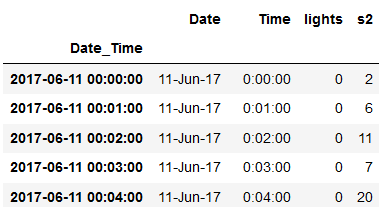

In [8]:
df['Date_Time']=df['Date'].astype(str)+' '+df['Time']
df=df.set_index('Date_Time')


## Experiment 2: Explore first full day

Make a new dataframe, **df_day1** which contains first full day of recordings. It should look like this

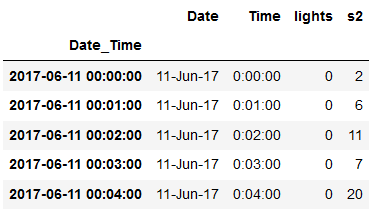

In [10]:
df_day1=df.loc[df['Date']=='11-Jun-17']


Plot the first full day of the recordings with the light indicator plotted as a shaded ares (light zero-shaded, light one is non shaded). Below is a simple template with implementatin of the vertical shaded area

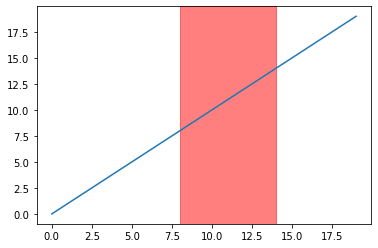

In [11]:
# Plot a lime of twenty 
x = range(20)
y = range(20)
# Plot x vs y
plt.plot(x,y)
# Plot red shaded area between x-values 8 and 14, make sure it is semi-transparent(alpha)
plt.axvspan(8, 14, alpha=0.5, color='red')

plt.show()

Plot activity of spider, s2 vs, time on the full first day of recordings. Add shading indicating light off (light=0).Your graph should look like this:

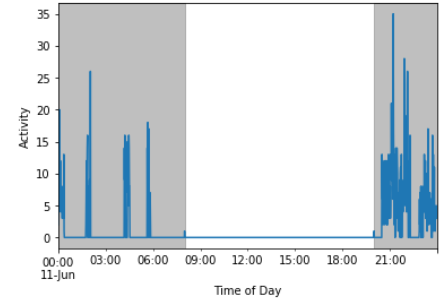

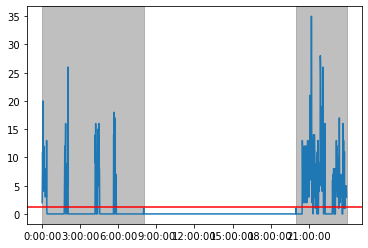

In [12]:
plt.plot(df_day1.Time, df_day1.s2)
plt.xticks(range(0, (len(df_day1.index)), 250))

for i in range(0, len(df_day1.index)-1):
    if df_day1.lights[i] == 1:
        lights_on = True
    else:
        lights_on = False
    if lights_on == False and i==0:
        start1 = i
    if lights_on==False and df_day1.lights[i-1] == 1:
        start = i
    if lights_on==False and i==( len(df_day1.index)-2):
        end2= 1439
    if lights_on == False and df_day1.lights[i+1] == 1:
        end1 = i+1
    

plt.axvspan(start1, end1, alpha=0.5, color='grey')
plt.axvspan(start, end2,alpha=0.5, color='grey')

plt.xticks(range(0,len(df_day1.index),180))
mean=np.mean(df_day1.s2)
plt.axhline(y = mean, color = 'r', linestyle = '-')

plt.show()

Calculate the mean of activity and plot it as a red horizontal line. It should look like this:

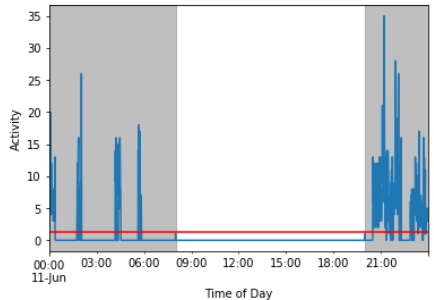

Convert your code for plotting into the function which takes a dataframe and return the plot of variable s2 vs. time. Test your function by applying it to the day 1 dataframe and confirming that you still have the same graph

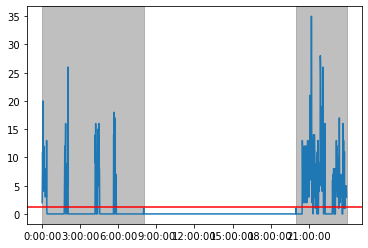

In [13]:
def ldgraph(df, ):
    plt.plot(df.Time, df.s2)
    plt.xticks(range(0,len(df.index),180))
    for i in range(0, len(df.index)-1):
        if df.lights[i] == 1:
            lights_on = True
        else:
            lights_on = False
        if lights_on == False and i==0:
            start1 = i
        if lights_on==False and df.lights[i-1] == 1:
            start = i
        if lights_on==False and i==( len(df.index)-2):
            end2= 1439
        if lights_on == False and df.lights[i+1] == 1:
            end1 = i+1
    
    plt.axvspan(start1, end1, alpha=0.5, color='grey')
    plt.axvspan(start, end2,alpha=0.5, color='grey')
    mean=np.mean(df.s2)
    plt.axhline(y = mean, color = 'r', linestyle = '-')
    plt.show()
    
ldgraph(df_day1)

## Experiment 3: Raster plot

Make a raster plot for Light- Dark period of the experiment by stacking days on the top of each other

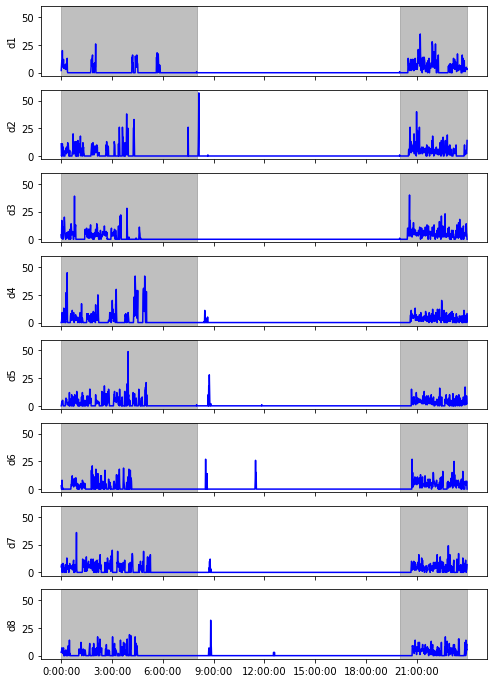

In [14]:
min_day=24*60
total_time = len(df.index)
num_days = total_time//min_day
fig, ax=plt.subplots(8,1, figsize=(8,12), sharey=True, sharex=True)

for i in range(0,8):
    ax[i].plot(df.Time[min_day*i:min_day*(i+1)], df.s2[min_day*i:min_day*(i+1)], color='blue')
    #ax[i].set_xlabel('Time')
    ax[i].set_ylabel('d'+str(i+1))
    ax[i].set_xticks([])
    dfa=df[min_day*i:min_day*(i+1)]
    for j in range(0, len(dfa.index)-1):
        if dfa.lights[j] == 1:
            lights_on = True
        else:
            lights_on = False
        if lights_on == False and j==0:
            start1 = j
        if lights_on==False and dfa.lights[j-1] == 1:
            start = j
        if lights_on==False and j==( len(dfa.index)-2):
            end2= j
        if lights_on == False and dfa.lights[j+1] == 1:
            end1 = j+1
    ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
    ax[i].axvspan(start, end2,alpha=0.5, color='grey')

ax[7].set_xticks(range(0, len(df_day1.index), 180)) 
#plt.xticks(range(0,len(df_day1.index),180))
plt.show()

Make a raster plot of Free-running(constant darkness) with all the area shaded

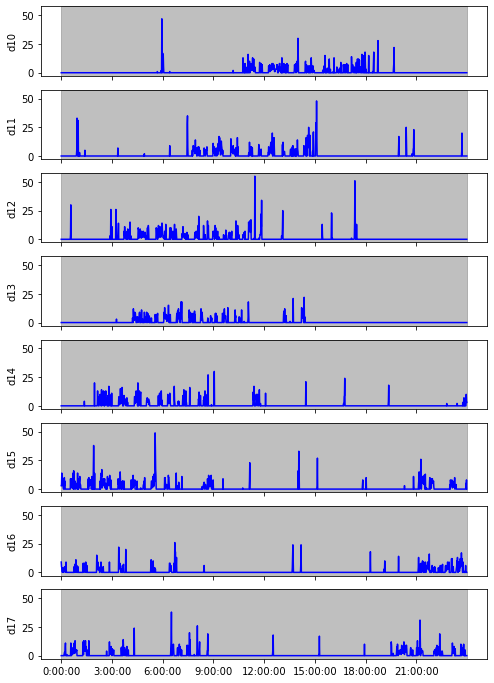

In [15]:
min_day=24*60
total_time = len(df.index)
num_days = total_time//min_day
fig, ax=plt.subplots(8,1, figsize=(8,12), sharey=True, sharex=True)

for i in range(9,17):
    ax[i-9].plot(df.Time[min_day*i:min_day*(i+1)], df.s2[min_day*i:min_day*(i+1)], color='blue')
    #ax[i].set_xlabel('Time')
    ax[i-9].set_ylabel('d'+str(i+1))
    ax[i-9].set_xticks([])
    dfa=df[min_day*(i):min_day*(i+1)]
    dfa=dfa.reset_index()
    if np.mean(dfa.lights)==0:
        ax[i-9].axvspan(0,min_day, alpha=.5, color='grey')
    else:
        for j in range(1, len(dfa.index)-1):
        
            if dfa.lights[j] == 1:
                lights_on = True
            else:
                lights_on = False
            if lights_on == False and j==0:
                start1 = j
            if lights_on==False and dfa.lights[j-1] == 1:
                start = j
            else:
                start= 0
            if lights_on==False and j==( len(dfa.index)-2):
                end2= j
            else:
                end2=0
            if lights_on == False and dfa.lights[j+1] == 1:
                end1 = j+1
            else:
                end1=min_day*(i+1)
        ax[i-9].axvspan(start1, end1, alpha=0.5, color='grey')
        ax[i-9].axvspan(start, end2,alpha=0.5, color='grey')

ax[7].set_xticks(range(0, len(df_day1.index), 180)) 
#plt.xticks(range(0,len(df_day1.index),180))
plt.show()

Make raster plot for the whole experiment. It shoudl look like this:

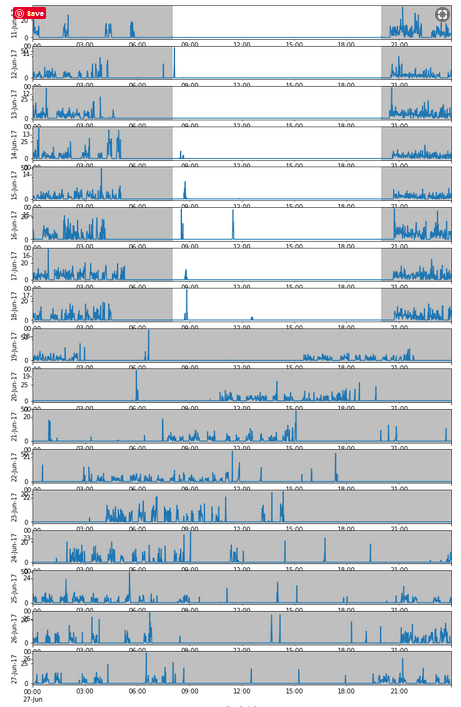

In [16]:
#trying to find y axis limits
med=df.replace(0, np.nan)

median=med.median()
std=med.std()
mean=med.mean()
y=np.mean(median)
a=np.mean(mean)
s=np.mean(std)
#current idea for limit: mean + 3 standard deviations
z=a+3*s


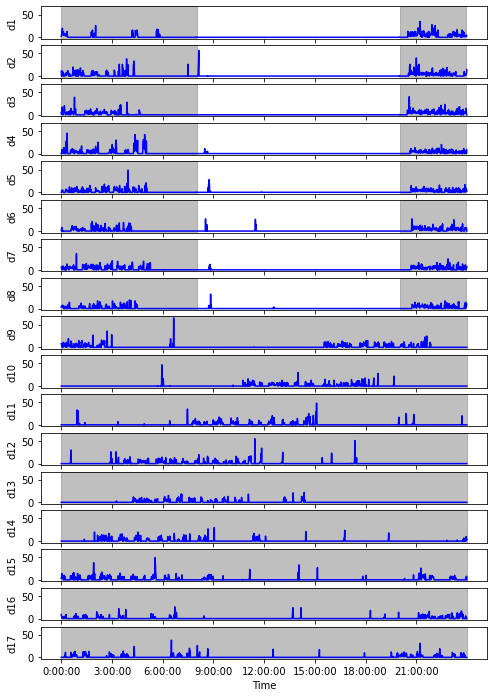

In [17]:
min_day=24*60
total_time = len(df.index)
num_days = total_time//min_day
fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
for i in range(0,num_days):
    ax[i].plot(df.Time[min_day*i:min_day*(i+1)], df.s2[min_day*i:min_day*(i+1)], color='blue')
    ax[i].set_ylabel('d'+str(i+1))
    ax[i].set_xticks([])
    #Setting the y axis limjits based on mean of all non-zero datapoints
    #ax[i].set_ylim(-1,z)
    dfa=df[min_day*(i):min_day*(i+1)]
    dfa=dfa.reset_index()
    if np.mean(dfa.lights)==0:
        ax[i].axvspan(0,min_day, alpha=.5, color='grey')
    else:
        for j in range(1, len(dfa.index)-1):
        
            if dfa.lights[j] == 1:
                lights_on = True
            else:
                lights_on = False
            if lights_on == False and j==0:
                start1 = j
            if lights_on==False and dfa.lights[j-1] == 1:
                start2 = j
            if lights_on==False and j==( len(dfa.index)-2):
                end2= j
            if lights_on == False and dfa.lights[j+1] == 1:
                end1 = j+1
        ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
        ax[i].axvspan(start2, end2,alpha=0.5, color='grey')


ax[num_days-1].set_xticks(range(0, len(df_day1.index), 180)) 
plt.xlabel('Time')
plt.show()

## Experiment 5: Plot raster plot for multiple spiders 

Download data from the file **Practice 4_data2.csv** into dataframe called **df**. This file contains data from the whole spider activity monitor which contains 32 spiders. Print first six line of the dataframe. It should look like this

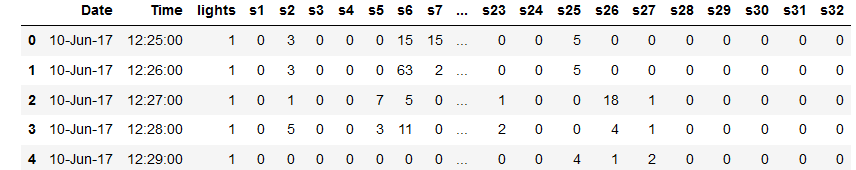

# Functions ***

In [52]:
dfn=pd.read_csv('Practice 4_data2.csv')
def wholedays(df):
    start = df.index[df['Time']=='0:00:00']
    end=df.index[df['Time']=='23:59:00']
    newdf=df[start[0]:(end[-1]+1)]
    return newdf
def setindex(df):
    df['Date_Time']=df['Date'].astype(str)+' '+df['Time']
    new=df.set_index('Date_Time')
    return new
def spiderraster(df, spider):
    min_day=24*60
    total_time = len(df.index)
    num_days = total_time//min_day
    fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
    #setting the y axis limit
    limit=df.replace(0, np.nan)
    std=limit.std()
    mean=limit.mean()
    u=np.mean(mean)
    s=np.mean(std)
    y=u+3*s
    #plotting the raster plots
    for i in range(0,num_days):
        ax[i].plot(df.Time[min_day*i:min_day*(i+1)], df[spider][min_day*i:min_day*(i+1)], color='blue')
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        dfa=df[min_day*(i):min_day*(i+1)]
        dfa=dfa.reset_index()
        if np.mean(dfa.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        else:
            for j in range(1, len(dfa.index)-1):
                global start1
                global end1
                global start2
                global end2
                if dfa.lights[j] == 1:
                    lights_on = True
                else:
                    lights_on = False
                if lights_on == False and j-1==0:
                    start1 = j
                if lights_on==False and dfa.lights[j-1] == 1:
                    start2 = j
                if lights_on==False and j==( len(dfa.index)-2):
                    end2= j
                if lights_on == False and dfa.lights[j+1] == 1:
                    end1 = j+1
            
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')
    ax[num_days-1].set_xticks(range(0, min_day, 180)) 
    plt.xlabel('Time')
    plt.suptitle(spider+' Locomotor Activity')
    #plt.show()
    #fig.savefig(spider+'raster.jpg')


 Use techniques from experiments 1 and 2 to remove incomplete days of experiments and make  convert index to Date Time format. Organize your code as series of function (one for deleting incomplete days and another for making date time index).Make sure to document function as clear as possible  - you will use it a lot in the next few weeks. Apply your functions to the experimental data frame.  Your resulting data frame should look like this:

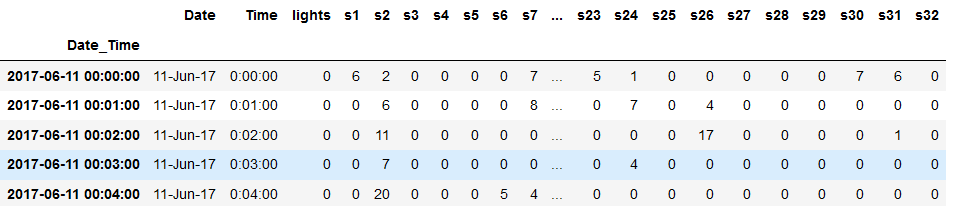

In [53]:
newdf=wholedays(dfn)
df=setindex(newdf)
df

<ipython-input-52-e5a6c385acc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Time']=df['Date'].astype(str)+' '+df['Time']


,Date,Time,lights,s1,s2,s3,s4,s5,s6,s7,...,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32
Date_Time,,,,,,,,,,,,,,,,,,,,,
11-Jun-17 0:00:00,11-Jun-17,0:00:00,0,6,2,0,0,0,0,7,...,5,1,0,0,0,0,0,7,6,0
11-Jun-17 0:01:00,11-Jun-17,0:01:00,0,0,6,0,0,0,0,8,...,0,7,0,4,0,0,0,0,0,0
11-Jun-17 0:02:00,11-Jun-17,0:02:00,0,0,11,0,0,0,0,0,...,0,0,0,17,0,0,0,0,1,0
11-Jun-17 0:03:00,11-Jun-17,0:03:00,0,0,7,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
11-Jun-17 0:04:00,11-Jun-17,0:04:00,0,0,20,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-Jun-17 23:55:00,27-Jun-17,23:55:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
27-Jun-17 23:56:00,27-Jun-17,23:56:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
27-Jun-17 23:57:00,27-Jun-17,23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,3


Now plot the raster plots for all the spiders in the dataset. Save raster plot as a .jpg image with spider id in a title. For example, the spider *s2* raster plot will be called **s2_raster.jpg**.  Visually inspect each image you generated. Summarize your observation as a set of research notes. Which spiders follow Light? Which ones have a free-running rhythm in the dark? Which ones died during the experiment? Which chambers are empty?

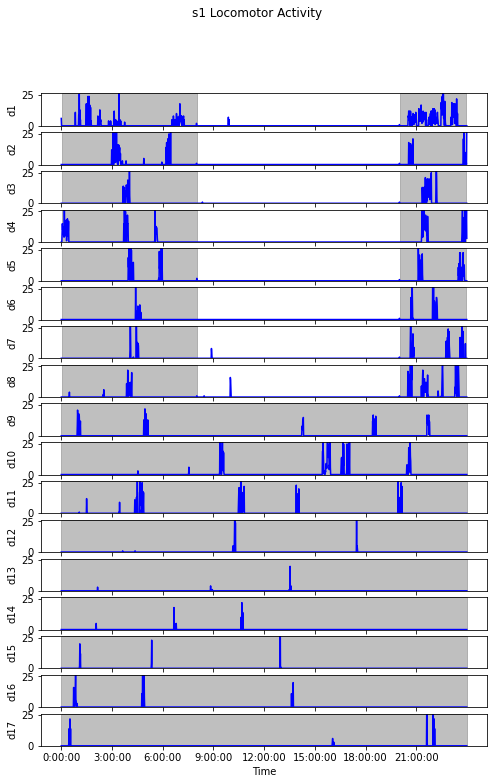

In [54]:
column_names = (df.columns.values[3:]) 
#for i in range(len(column_names)):
    #spiderraster(df,column_names[i])
spiderraster(df, column_names[0])

## Experiment 6: Compare Activity of different spiders

Congradulation of making a complex visualization for large number of spiders! If you look at the individual raster plots you have created, you will notice that the pattern of acitivity is quite different among the subjects. It is a great observation, but in science visual observation is not enought to reach the conclusion. In this experiment you can use your creativity and background on scientific experimentation to conduct QUANTITATIVE analysis of animal free running behavior. Conduct informative quantitative ananlysis supported by visualizaiton to provide comparison of locomotive behavior among the spiders.  In the space below please compose a brief report on this comparative analysis. Your report should include
 -  Biological rational on variatinon in free running periods. 
     - You should use at least 3 peer-review sources
 - An optimal visualization which compares/summarizes LD activity among all alive spiders
 - Am optimal visualization which compares/summarizes DD activity among all alive spiders
 - Quantitative comparison of locomotor activity in LD and DD tables and/or visualization
 - Your interpretation of table/visualization above
 - Conclusion section where you logically explain the similarity/differences among the spiders



In [68]:
lastday=df[min_day*(num_days-1):min_day*(num_days)]
for i in range(0,len(column_names)):
    check=lastday[column_names[i]]
    if np.mean(check)==0:
        df_alive=df.drop([column_names[i]], axis=1)
df_alive

,Date,Time,lights,s1,s2,s3,s4,s5,s6,s7,...,s22,s23,s24,s25,s26,s27,s29,s30,s31,s32
Date_Time,,,,,,,,,,,,,,,,,,,,,
11-Jun-17 0:00:00,11-Jun-17,0:00:00,0,6,2,0,0,0,0,7,...,0,5,1,0,0,0,0,7,6,0
11-Jun-17 0:01:00,11-Jun-17,0:01:00,0,0,6,0,0,0,0,8,...,9,0,7,0,4,0,0,0,0,0
11-Jun-17 0:02:00,11-Jun-17,0:02:00,0,0,11,0,0,0,0,0,...,6,0,0,0,17,0,0,0,1,0
11-Jun-17 0:03:00,11-Jun-17,0:03:00,0,0,7,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
11-Jun-17 0:04:00,11-Jun-17,0:04:00,0,0,20,0,0,0,5,4,...,12,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-Jun-17 23:55:00,27-Jun-17,23:55:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
27-Jun-17 23:56:00,27-Jun-17,23:56:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
27-Jun-17 23:57:00,27-Jun-17,23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,3


In [69]:
columns_alive=df_alive.columns.values[3:]
for i in range(0, num_days):
    dfa=df_alive[min_day*(i):min_day*(i+1)]
    dfa=dfa.reset_index()
    if np.mean(dfa.lights)==0:
        ld=df_alive.drop((df_alive.index[min_day*(i):min_day*(i+1)]))
ld

,Date,Time,lights,s1,s2,s3,s4,s5,s6,s7,...,s22,s23,s24,s25,s26,s27,s29,s30,s31,s32
Date_Time,,,,,,,,,,,,,,,,,,,,,
11-Jun-17 0:00:00,11-Jun-17,0:00:00,0,6,2,0,0,0,0,7,...,0,5,1,0,0,0,0,7,6,0
11-Jun-17 0:01:00,11-Jun-17,0:01:00,0,0,6,0,0,0,0,8,...,9,0,7,0,4,0,0,0,0,0
11-Jun-17 0:02:00,11-Jun-17,0:02:00,0,0,11,0,0,0,0,0,...,6,0,0,0,17,0,0,0,1,0
11-Jun-17 0:03:00,11-Jun-17,0:03:00,0,0,7,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
11-Jun-17 0:04:00,11-Jun-17,0:04:00,0,0,20,0,0,0,5,4,...,12,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-Jun-17 23:55:00,26-Jun-17,23:55:00,0,0,6,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
26-Jun-17 23:56:00,26-Jun-17,23:56:00,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
26-Jun-17 23:57:00,26-Jun-17,23:57:00,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
bar={}

for i in range(0, columns_alive):
    mean=np.mean
    
    for j in range(4):
         my_dict[str(i)].append(j)